# Logistic Regression for Beginners
In this tutorial, we will learn about logistic regression, a popular classification algorithm. We will cover the basic concepts, implement a logistic regression model using Scikit-Learn, and evaluate its performance.


## Introduction to Logistic Regression

**Logistic Regression** is a statistical model used for binary classification. It predicts the probability that a given input point belongs to a certain class.


### Key Points:
- Suitable for binary classification problems.
- Predicts the probability of the input belonging to one of the classes.
- Uses a sigmoid function to map predicted values to probabilities.

## How does it Work?

Logistic regression uses the sigmoid function to map predicted values to probabilities.

### Sigmoid Function:
The sigmoid function is defined as:
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Where \( z \) is the input to the function. The sigmoid function outputs values between 0 and 1, which can be interpreted as probabilities.

![Alt Text](logistic_regression_plot.png)

## Building a Logistic Regression Classification Model

### Email Spam Dataset
In this notebook, we will build a logistic regression classification model to classify emails as spam or not spam using the Kaggle email spam dataset. We will go through the steps of loading the data, preprocessing, training the model, and evaluating its performance.


### Step 1: Importing Libraries

In [10]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Loading the Dataset

In [11]:
# Load the dataset
# Assuming the dataset is in a file named 'spam.csv' in the current directory
data = pd.read_csv('spam_ham_dataset.csv')

# Display the first few rows of the dataset
data.head()

,Unnamed: 0,label,text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...


In [12]:
data.shape

(5171, 3)

In [13]:
# Display the structure of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB
None


In [14]:
data.describe()

,Unnamed: 0
count,5171.000000
mean,2585.000000
std,1492.883452
min,0.000000
25%,1292.500000
50%,2585.000000
75%,3877.500000
max,5170.000000


### Step 3: Data Cleaning and Preparation

In [15]:
data.columns

Index(['Unnamed: 0', 'label', 'text'], dtype='object')

In [16]:
# Drop unnecessary columns
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [17]:
data.columns

Index(['label', 'text'], dtype='object')

In [18]:
# Check for missing values
print(data.isnull().sum())

label    0
text     0
dtype: int64


In [19]:
# Handle missing values (if any)
data.dropna(inplace=True)

In [20]:
# Encode the target variable ('label' column)
data['label_num'] = data['label'].map({'spam': 1, 'ham': 0})

In [21]:
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


### Step 4: Visualize the Data

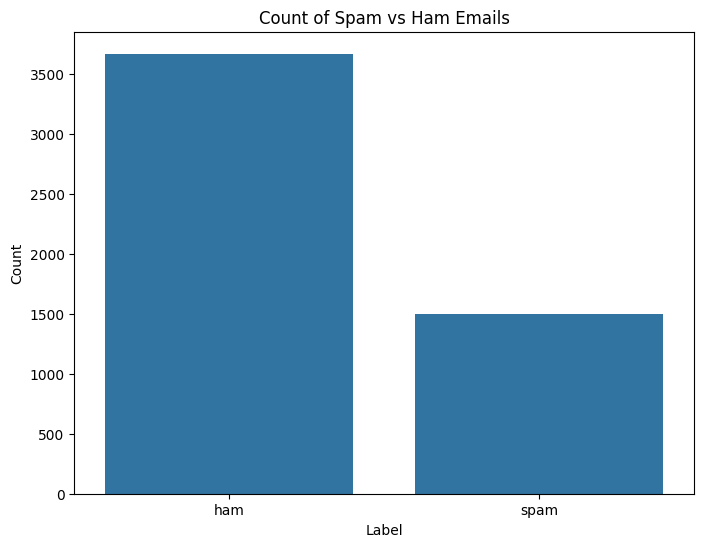

In [22]:
import seaborn as sns

# Plot count plot of spam vs ham
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Spam vs Ham Emails')
plt.show()

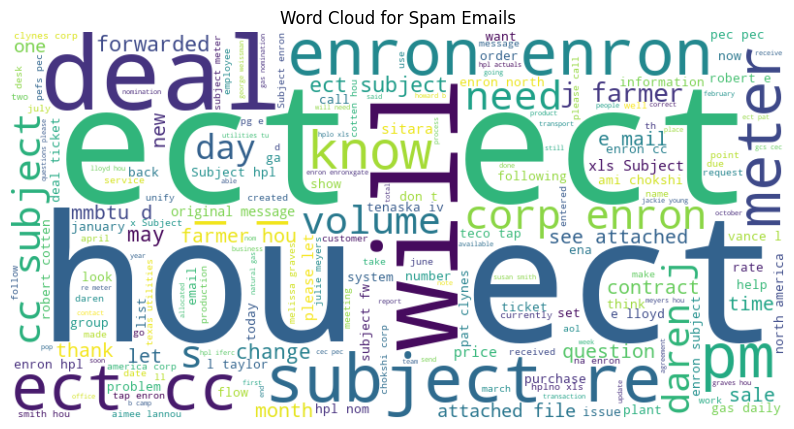

In [24]:
from wordcloud import WordCloud

# Combine all text from spam emails

spam_text = " ".join(data[data['label'] == 'ham']['text'].tolist())

# Generate and display word cloud for spam emails
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()


### Step 5: Feature Engineering

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data['text'])

### Step 6: Splitting the Data

In [26]:
from sklearn.model_selection import train_test_split

y = data['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 7: Building the Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### Step 8: Making Predictions

In [28]:
# Make predictions on the test data
y_pred = model.predict(X_test)

### Step 8: Evaluating the Model

Accuracy: 0.98


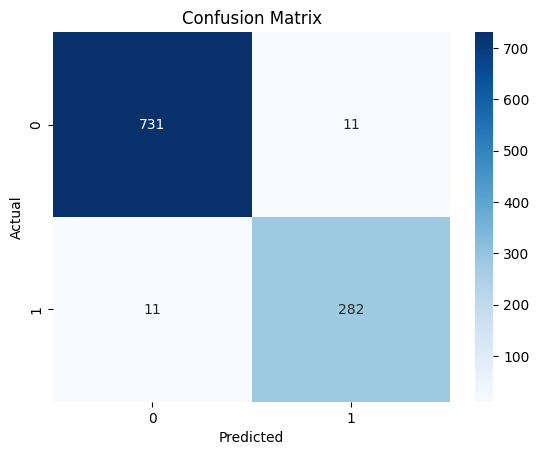

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.96      0.96      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

- **Accuracy** is a metric that measures the proportion of correct predictions
- **Precision** measures how many of the predictions made by the model are actually correct.
- **Recall** measures how many of the actual positive cases the model correctly predicted. 
- **F1-score** is the harmonic mean of precision and recall.
- **Support** is the number of actual occurrences of each class in the dataset

![Alt Text](Confusion_matrix.jpg)

### Step 10: Testing the Model

In [30]:
def predict_spam(email_text):
    # Transform the input text using the loaded vectorizer
    email_features = vectorizer.transform([email_text])
    
    # Make prediction using the loaded model
    prediction = model.predict(email_features)
    
    # Convert numerical prediction to label
    return 'spam' if prediction[0] == 1 else 'ham'

In [31]:
# Example usage
email_text = "Congratulations! You've won a free iPhone. Click here to claim your prize."
result = predict_spam(email_text)
print(result)  # Output: 'spam'

spam
